In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#load data
water_train = pd.read_csv("C:\Datasets\water_train.csv")#, index_col=0)
water_test = pd.read_csv("C:\Datasets\water_test.csv")#, index_col=0)
water_records_trans2 = pd.read_csv("C:\Datasets\water_records_trans2.csv")#, index_col=0)
watertest_records_trans2 = pd.read_csv("C:\Datasets\watertest_records_trans2.csv")#, index_col=0)
water_target = pd.read_csv("C:\Datasets\water_training_labels.csv")
water_target = water_target.drop('id', 1)

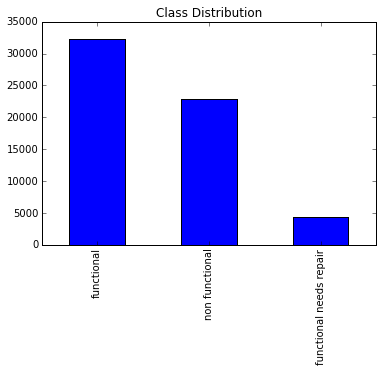

In [3]:
plt.show(water_target["status_group"].value_counts().plot(kind='bar', title="Class Distribution"))

In [4]:
water_target["status_group"].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
dtype: int64

Class Distribution:

functional: 32259/59400 (54.308%)

non-functional: 22824/59400 (38.424%)

functional needs repair: 4317/59400 (7.268%)

In [6]:
water_train_ssf=pd.get_dummies(water_train)
water_test_ssf=pd.get_dummies(water_test)

In [7]:
water_target_array=np.array(water_target)
water_target_array=water_target_array.squeeze()
water_target_array

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [8]:
#Model Construction

In [9]:
water_train2, water_test2, water_target_train, water_target_test = train_test_split(water_train_ssf, water_target_array, test_size=0.34)
print water_train2.shape, water_test2.shape, water_target_train.shape, water_target_test.shape 
#water_train2, water_test2, water_target_train, water_target_test = train_test_split(water_records_trans2, water_target, test_size=0.34)
#print water_train2.shape, water_test2.shape, water_target_train.shape, water_target_test.shape 


(39204, 225) (20196, 225) (39204L,) (20196L,)


In [10]:
water_train2.head(5)

,amount_tsh,gps_height,longitude,latitude,population,days_frm_20131213,Month_Recorded,funder_0,funder_Danida,funder_Dhv,...,Construction_Year_Str_2004,Construction_Year_Str_2005,Construction_Year_Str_2006,Construction_Year_Str_2007,Construction_Year_Str_2008,Construction_Year_Str_2009,Construction_Year_Str_2010,Construction_Year_Str_2011,Construction_Year_Str_2012,Construction_Year_Str_Other
57639,0,0,32.842600,-4.883742,0,365,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14140,0,716,37.354658,-3.477799,1,223,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14052,0,0,34.068569,-3.559637,0,423,10,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35891,1000,1928,35.152189,-8.589340,0,1003,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1731,500,508,34.650712,-11.064397,90,102,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
water_target_train_np=np.array(water_target_train)
water_target_train_np=np.squeeze(water_target_train_np)
water_target_train_np.shape

(39204L,)

In [12]:
water_target_train_np

array(['non functional', 'non functional', 'functional', ...,
       'non functional', 'functional', 'functional'], dtype=object)

In [13]:
water_target_test_np=np.array(water_target_test)
water_target_test_np=np.squeeze(water_target_test_np)
water_target_test_np.shape

(20196L,)

In [24]:
#random forest
#Grid search using Random Forest
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
rfparameters = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': range(50, 501, 50),
    'min_samples_split': range(120, 271, 10),
    'min_samples_leaf' : range(60,131,10)
}

rf_gs = GridSearchCV(rf, rfparameters, verbose=1, cv=5)
#'max_depth': np.linspace(1, 20, 10),


In [ ]:
%time _ = rf_gs.fit(water_train2, water_target_train_np)
rf_gs.best_params_, rf_gs.best_score_

Ideally, a grid search would be implemented to explore how the adjustment of various parameter values affects performance metrics, but let's just try some values for now.

In [18]:
rf = RandomForestClassifier(criterion="entropy", n_estimators=500)
#criterion='entropy',max_depth=3,min_samples_split=6, 
rf.fit(water_train2, water_target_train_np)
rf_predictions=rf.predict(water_train2)
print "Accuracy:{0:.5f}".format(metrics.accuracy_score(water_target_train_np, rf_predictions)),"\n"
print "Classification report"
print metrics.classification_report(water_target_train_np, rf_predictions),"\n"
print "Confussion matrix"
print metrics.confusion_matrix(water_target_train_np, rf_predictions),"\n"

Accuracy:0.99862 

Classification report
             precision    recall  f1-score   support

 functional       1.00      1.00      1.00     21188
functional needs repair       0.99      0.99      0.99      2873
non functional       1.00      1.00      1.00     15143

avg / total       1.00      1.00      1.00     39204


Confussion matrix
[[21172    12     4]
 [   22  2851     0]
 [   11     5 15127]] 



In [19]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=500)
#,max_depth=3,min_samples_split=6, 
rf.fit(water_train2, water_target_train_np)
rf_predictions=rf.predict(water_test2)
print "Accuracy:{0:.5f}".format(metrics.accuracy_score(water_target_test_np, rf_predictions)),"\n"
print "Classification report"
print metrics.classification_report(water_target_test_np, rf_predictions),"\n"
print "Confussion matrix"
print metrics.confusion_matrix(water_target_test_np, rf_predictions),"\n"

Accuracy:0.80011 

Classification report
             precision    recall  f1-score   support

 functional       0.81      0.87      0.84     11071
functional needs repair       0.51      0.36      0.42      1444
non functional       0.83      0.78      0.80      7681

avg / total       0.79      0.80      0.80     20196


Confussion matrix
[[9671  353 1047]
 [ 708  523  213]
 [1558  158 5965]] 



In [20]:
ex = ExtraTreesClassifier(criterion="entropy", n_estimators=500)
ex.fit(water_train2, water_target_train_np)
ex_predictions=ex.predict(water_train2)
print "Accuracy:{0:.5f}".format(metrics.accuracy_score(water_target_train_np, ex_predictions)),"\n"
print "Classification report"
print metrics.classification_report(water_target_train_np, ex_predictions),"\n"
print "Confussion matrix"
print metrics.confusion_matrix(water_target_train_np, ex_predictions),"\n"

Accuracy:0.99862 

Classification report
             precision    recall  f1-score   support

 functional       1.00      1.00      1.00     21188
functional needs repair       1.00      0.99      0.99      2873
non functional       1.00      1.00      1.00     15143

avg / total       1.00      1.00      1.00     39204


Confussion matrix
[[21183     5     0]
 [   29  2844     0]
 [   16     4 15123]] 



In [21]:
ex = ExtraTreesClassifier(criterion="entropy", n_estimators=500)
ex.fit(water_train2, water_target_train_np)
ex_predictions=ex.predict(water_test2)
print "Accuracy:{0:.5f}".format(metrics.accuracy_score(water_target_test_np, ex_predictions)),"\n"
print "Classification report"
print metrics.classification_report(water_target_test_np, ex_predictions),"\n"
print "Confussion matrix"
print metrics.confusion_matrix(water_target_test_np, ex_predictions),"\n"

Accuracy:0.78783 

Classification report
             precision    recall  f1-score   support

 functional       0.81      0.85      0.83     11071
functional needs repair       0.46      0.37      0.41      1444
non functional       0.80      0.78      0.79      7681

avg / total       0.78      0.79      0.78     20196


Confussion matrix
[[9400  439 1232]
 [ 664  537  243]
 [1525  182 5974]] 



In [23]:
ab = AdaBoostClassifier(n_estimators=500)
ab.fit(water_train2, water_target_train_np)
ab_predictions=ab.predict(water_train2)
print "Accuracy:{0:.5f}".format(metrics.accuracy_score(water_target_train_np, ab_predictions)),"\n"
print "Classification report"
print metrics.classification_report(water_target_train_np, ab_predictions),"\n"
print "Confussion matrix"
print metrics.confusion_matrix(water_target_train_np, ab_predictions),"\n"

Accuracy:0.74536 

Classification report
             precision    recall  f1-score   support

 functional       0.73      0.89      0.80     21188
functional needs repair       0.46      0.09      0.16      2873
non functional       0.78      0.67      0.72     15143

avg / total       0.73      0.75      0.72     39204


Confussion matrix
[[18805   155  2228]
 [ 2031   270   572]
 [ 4840   157 10146]] 



In [24]:
ab = AdaBoostClassifier(n_estimators=500)
ab.fit(water_train2, water_target_train_np)
ab_predictions=ab.predict(water_test2)
print "Accuracy:{0:.5f}".format(metrics.accuracy_score(water_target_test_np, ab_predictions)),"\n"
print "Classification report"
print metrics.classification_report(water_target_test_np, ab_predictions),"\n"
print "Confussion matrix"
print metrics.confusion_matrix(water_target_test_np, ab_predictions),"\n"

Accuracy:0.74371 

Classification report
             precision    recall  f1-score   support

 functional       0.73      0.88      0.80     11071
functional needs repair       0.43      0.09      0.15      1444
non functional       0.78      0.66      0.72      7681

avg / total       0.73      0.74      0.72     20196


Confussion matrix
[[9791   88 1192]
 [1047  131  266]
 [2500   83 5098]] 



In [25]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=500)
#,max_depth=3,min_samples_split=6, 
rf.fit(water_train_ssf, water_target_array)
rf_predictions=rf.predict(water_test_ssf)

In [26]:
rf_predictions[:5]

array(['functional', 'functional', 'functional', 'non functional',
       'functional'], dtype=object)

In [27]:
rf_predictions_pd=pd.DataFrame(rf_predictions)

In [28]:
water_test_full = pd.read_csv("C:\Datasets\water_test_data.csv")#, index_col=0)
water_test_id = water_test_full['id']
water_test_id.head(5)

0    50785
1    51630
2    17168
3    45559
4    49871
Name: id, dtype: int64

In [29]:
water_test_predictions=pd.concat([water_test_id, rf_predictions_pd],axis=1)
water_test_predictions[:5]

,id,0
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [30]:
water_test_predictions.rename(columns={0: 'status_group'}, inplace=True)

In [31]:
water_test_predictions[:5]

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [32]:
water_test_predictions.to_csv("water_test_predictions.csv", index=False)